In [1]:
import sandy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import lognorm

In [451]:
dummy_cov = np.asarray([[5/100,-4/70],[-4/70,3/49]])
dummy_mean = np.array([10,7])
dummy_center = np.ones(2)
dummy_std = np.array([np.sqrt(5/100), np.sqrt(3/49)])

In [452]:
np.linalg.eig(dummy_cov)[0]

array([-0.00180555,  0.11303004])

## Normal

In [453]:
df = pd.DataFrame(np.random.multivariate_normal(dummy_center, dummy_cov, size=100000))

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


covariance:
             0            1
0  5.20672e-02 -5.53618e-02
1 -5.53618e-02  6.28059e-02


mean: [0.9998048670863129, 1.0001423669985525]


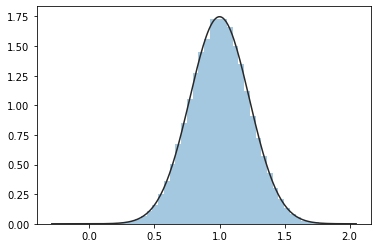

In [454]:
sns.distplot(x=df.iloc[:,0], fit=norm, kde=False)
print(f"""covariance:
{df.cov()}


mean: {[df.iloc[:,0].mean(), df.iloc[:,1].mean()]}""")

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

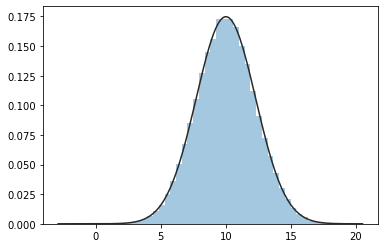

In [455]:
samples = df.iloc[:,0]*dummy_mean[0]
sns.distplot(x=samples, fit=norm, kde=False)

## Lognormal

In [456]:
normal_equivalent_cov = (np.exp(dummy_cov)-1)*np.prod(dummy_center) # vale per una matrice 2x2 va bene la divisione per 1 ??
normal_equivalent_mean = np.log(dummy_center)-dummy_std**2/2

In [457]:
df = pd.DataFrame(np.random.multivariate_normal(normal_equivalent_mean, normal_equivalent_cov, size=100000)).apply(np.exp)

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


covariance:
             0            1
0  5.27697e-02 -5.41199e-02
1 -5.41199e-02  6.52275e-02


mean: [1.0011624892185653, 1.0002198407308642]


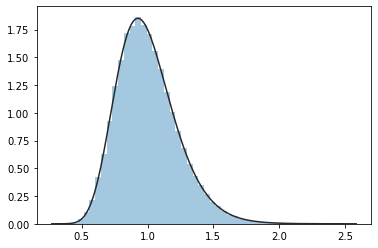

In [458]:
sns.distplot(x=df.iloc[:,0], fit=lognorm, kde=False)
print(f"""covariance:
{df.cov()}


mean: {[df.iloc[:,0].mean(), df.iloc[:,1].mean()]}""")

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

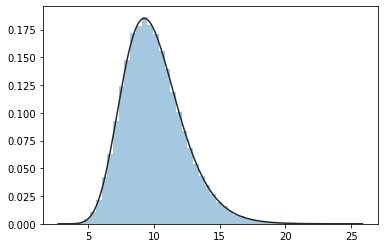

In [459]:
samples = df.iloc[:,0]*dummy_mean[0]
sns.distplot(x=samples, fit=lognorm, kde=False)

In [460]:
dd = pd.concat([df.iloc[:,0]*dummy_mean[0], df.iloc[:,1]*dummy_mean[1]], ignore_index=True, axis=1)

In [461]:
dd.cov()

,0,1
0,5.27697e+00,-3.78839e+00
1,-3.78839e+00,3.19615e+00


# Test case: Eu155

$$ cov(x_i, x_j) = (e^{cov(ln(x_i),ln(x_j))}-1)\cdot<x_i><x_j> $$

In [462]:
endf6 = sandy.get_endf6_file('jeff_33','xs', 631550)
# endf6 = sandy.get_endf6_file('jeff_33','xs', 922350)  # This was tested. It gives no error, but its smaller std gives less evident results

In [463]:
Cov = sandy.XsCov.from_endf6(endf6)
BE = sandy.Xs.from_endf6(endf6)

## Normal

In [464]:
df = pd.DataFrame(np.random.multivariate_normal(np.ones(len(Cov)), Cov, size=1000000))

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




mean: [0.9636815054506004, 0.9830082955835906]


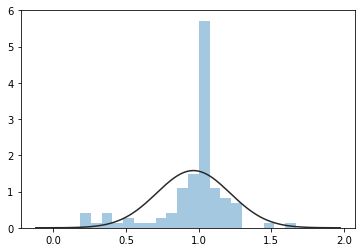

In [465]:
sns.distplot(x=df.iloc[0,:], bins= 20, fit=norm, kde=False)
print(f"""

mean: {[df.iloc[0,:].mean(), df.iloc[-1,:].mean()]}""")

In [466]:
df.values.min()

-3.888276182763171

## Lognormal

In [467]:
COV = Cov.apply(np.exp) - 1 * 1 * 1  # Target mean to 1

In [468]:
std = Cov.std(axis=1)

In [469]:
normal_equivalent_mean = np.log(np.ones(len(Cov))) - std**2/2

In [470]:
df = pd.DataFrame(np.random.multivariate_normal(normal_equivalent_mean, COV, size=1000000)).apply(np.exp)

C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


C:\Users\fgrimald\Anaconda3\envs\sandy-devel\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)




mean: [1.088601700903344, 1.039112103246743]


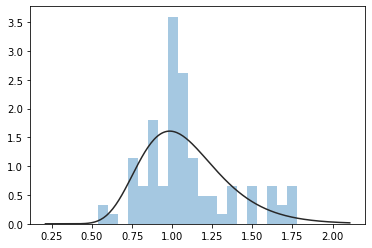

In [471]:
sns.distplot(x=df.iloc[0,:], bins= 20, fit=lognorm, kde=False)
print(f"""

mean: {[df.iloc[0,:].mean(), df.iloc[-1,:].mean()]}""")

In [472]:
df.values.min()

0.002691316318290994

## Comparison with what is implemented in CategoryCov

Consider the negative eigenvalues are set to 0 in CategoryCov sampling method, but not in our proposed procedure.
Eigenvalues could be set to zero in the latter as well, if one wants.

In [473]:
zam = 10010
endf6 = sandy.get_endf6_file('jeff_33','xs', zam)
Cov = sandy.XsCov.from_endf6(endf6)
BE = sandy.Xs.from_endf6(endf6)

In [474]:
# Cov.reset_index()

In [475]:
CatCov = sandy.CategoryCov(Cov)
CatCov_semp = pd.DataFrame(np.cov(CatCov.sampling(nsmp=10000, tolerance=0).data.T))
# CatCov_semp

In [476]:
Cov_ = sandy.CategoryCov(Cov)
E, V = Cov_.eig(tolerance = 0)
Cov_ = V.dot(np.diag(E)).dot(np.linalg.inv(V))
df = pd.DataFrame(np.random.multivariate_normal(np.ones(len(Cov)), Cov_, size=10000))
# df.cov()

In [477]:
Delta_CategoryCov = abs(CatCov_semp.values-Cov.values)
Delta_E_CategoryCov = abs(np.linalg.eig(CatCov_semp)[0]-np.linalg.eig(Cov)[0])
print(f"""Maximum absolute difference in the matrix: {Delta_CategoryCov.max()}
Maximum absolute difference in the eigenvalues: {Delta_E_CategoryCov.max()}""")

Maximum absolute difference in the matrix: 0.0018864399152059563
Maximum absolute difference in the eigenvalues: 1.0681724236465893


In [478]:
Delta_df = abs(df.cov().values-Cov.values)
Delta_E_df = abs(np.linalg.eig(Delta_df)[0].max()-np.linalg.eig(Cov)[0].max())
print(f"""Maximum absolute difference in the matrix: {Delta_df.max()}
Maximum absolute difference in the eigenvalues: {Delta_E_df}""")

Maximum absolute difference in the matrix: 0.0010094720053583917
Maximum absolute difference in the eigenvalues: 1.058357502846415


In [479]:
# BEST = {}
# BEST_E = {}

In [480]:
if Delta_df.max() < Delta_CategoryCov.max():
    BEST[zam] = 1 # if the newly peroposed method gives better covariance representation accoring to this measure
else:
    BEST[zam] = 0
    
if Delta_E_df.max() < Delta_E_CategoryCov.max():
    BEST_E[zam] = 1 # if the newly peroposed method gives better covariance representation accoring to this measure
else:
    BEST_E[zam] = 0

In [481]:
b = pd.Series(BEST)
e = pd.Series(BEST_E)

In [482]:
len(b[b==1])/len(BEST)

0.4166666666666667

In [483]:
len(e[e==1])/len(BEST_E)

0.5833333333333334

In [484]:
BEST

{10010: 1,
 922350: 0,
 942390: 1,
 942410: 0,
 922330: 0,
 10020: 1,
 30060: 1,
 40090: 1,
 100200: 0,
 441020: 0,
 631550: 0,
 812050: 0}

In [485]:
BEST_E

{10010: 1,
 922350: 0,
 942390: 0,
 942410: 1,
 922330: 1,
 10020: 1,
 30060: 1,
 40090: 0,
 100200: 1,
 441020: 0,
 631550: 0,
 812050: 1}

In [486]:
import os
os.system('jupyter nbconvert --to html random_multivariate.ipynb')

0